## Instalar as bibliotecas necessárias para a análise

In [1]:
!pip install plotly

In [8]:
import pandas as pd
import numpy as np

##### Ler o arquivo CSV

In [9]:
data = pd.read_csv("AccidentsPortugues.csv")
data.head()

,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,classificacao_acidente,...,feridos_leves,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude,regional,delegacia
0,2017-01-01,domingo,01:45:00,RS,116.0,"34,9",VACARIA,Defeito Mecânico no Veículo,Colisão traseira,Com Vítimas Feridas,...,4,0,2,0,4,2,-28.50712,-50.94118,SPRF-RS,DEL05-RS
1,2017-01-01,domingo,01:00:00,PR,376.0,636,TIJUCAS DO SUL,Velocidade Incompatível,Saída de leito carroçável,Com Vítimas Fatais,...,0,0,1,0,0,2,-25.75400,-49.12660,SPRF-PR,DEL01-PR
2,2017-01-01,domingo,04:40:00,BA,101.0,65,ENTRE RIOS,Condutor Dormindo,Colisão frontal,Com Vítimas Fatais,...,1,1,2,0,2,2,-11.96180,-38.09530,SPRF-BA,DEL01-BA
3,2017-01-01,domingo,06:30:00,PA,316.0,"72,5",CASTANHAL,Falta de Atenção à Condução,Colisão lateral,Com Vítimas Fatais,...,0,0,3,0,0,3,-1.28998,-47.83483,SPRF-PA,DEL01-PA
4,2017-01-01,domingo,09:00:00,GO,20.0,"220,5",POSSE,Defeito na Via,Colisão com objeto estático,Com Vítimas Feridas,...,2,1,0,0,3,1,-14.14221,-46.32259,SPRF-DF,DEL02-DF


In [37]:
# Visualizar as informações sobre as colunas do dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463152 entries, 0 to 463151
Data columns (total 27 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   data_inversa            463152 non-null  object 
 1   dia_semana              463152 non-null  object 
 2   horario                 463152 non-null  object 
 3   uf                      463152 non-null  object 
 4   br                      462162 non-null  float64
 5   km                      462162 non-null  object 
 6   municipio               463152 non-null  object 
 7   causa_acidente          463152 non-null  object 
 8   tipo_acidente           463112 non-null  object 
 9   classificacao_acidente  463152 non-null  object 
 10  fase_dia                463152 non-null  object 
 11  sentido_via             463152 non-null  object 
 12  condicao_metereologica  463152 non-null  object 
 13  tipo_pista              463152 non-null  object 
 14  tracado_via         

In [38]:
# Visualizar os valores nulos do dataset
print(data.isnull().sum())

data_inversa                 0
dia_semana                   0
horario                      0
uf                           0
br                         990
km                         990
municipio                    0
causa_acidente               0
tipo_acidente               40
classificacao_acidente       0
fase_dia                     0
sentido_via                  0
condicao_metereologica       0
tipo_pista                   0
tracado_via                  0
pessoas                      0
mortos                       0
feridos_leves                0
feridos_graves               0
ilesos                       0
ignorados                    0
feridos                      0
veiculos                     0
latitude                     0
longitude                    0
regional                    10
delegacia                 1310
dtype: int64


#### Há valores nulos nas colunas "br", "km", "tipo_acidente", "regional" e "delegacia". Esses valores precisam ser tratados entendendo a causa da invalidez de cada um

In [39]:
# A coluna "br" deve ser string, mas foi interpretada automaticamente como float (pois os nomes das BRs são números).
# Antes de converter os dados, é preciso fazer uma cópia do dataset
data_backup = data.copy()

# Com o backup feito, posso alterar a coluna "br" para string
data['br'] = data['br'].astype(str).str.split('.').str[0]

# Visualizando os dados nulos após a alteração
print(data.isnull().sum())

data_inversa                 0
dia_semana                   0
horario                      0
uf                           0
br                           0
km                         990
municipio                    0
causa_acidente               0
tipo_acidente               40
classificacao_acidente       0
fase_dia                     0
sentido_via                  0
condicao_metereologica       0
tipo_pista                   0
tracado_via                  0
pessoas                      0
mortos                       0
feridos_leves                0
feridos_graves               0
ilesos                       0
ignorados                    0
feridos                      0
veiculos                     0
latitude                     0
longitude                    0
regional                    10
delegacia                 1310
dtype: int64


In [36]:
# Restam poucos nulos, então vou verificar a quantidade total de linhas para me certificar que a remoção dos nulos não afetará a estatística.

print(data.shape)

(463152, 27)


In [25]:
# Como existem 463.152 linhas, vou remover todos os nulos restantes.
data = data.dropna()

# Visualizando a informação de nulos
print(data.isnull().sum())

#visualizando o total de linhas no dataset, estes serão os dados analisados
print(data.shape)

data_inversa              0
dia_semana                0
horario                   0
uf                        0
br                        0
km                        0
municipio                 0
causa_acidente            0
tipo_acidente             0
classificacao_acidente    0
fase_dia                  0
sentido_via               0
condicao_metereologica    0
tipo_pista                0
tracado_via               0
pessoas                   0
mortos                    0
feridos_leves             0
feridos_graves            0
ilesos                    0
ignorados                 0
feridos                   0
veiculos                  0
latitude                  0
longitude                 0
regional                  0
delegacia                 0
dtype: int64
(460889, 27)


In [27]:
# Novamente, visualizando os dados da tabela para iniciar a análise a respeito dos acidentes
data.head()

,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,classificacao_acidente,...,feridos_leves,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude,regional,delegacia
0,2017-01-01,domingo,01:45:00,RS,116,"34,9",VACARIA,Defeito Mecânico no Veículo,Colisão traseira,Com Vítimas Feridas,...,4,0,2,0,4,2,-28.50712,-50.94118,SPRF-RS,DEL05-RS
1,2017-01-01,domingo,01:00:00,PR,376,636,TIJUCAS DO SUL,Velocidade Incompatível,Saída de leito carroçável,Com Vítimas Fatais,...,0,0,1,0,0,2,-25.75400,-49.12660,SPRF-PR,DEL01-PR
2,2017-01-01,domingo,04:40:00,BA,101,65,ENTRE RIOS,Condutor Dormindo,Colisão frontal,Com Vítimas Fatais,...,1,1,2,0,2,2,-11.96180,-38.09530,SPRF-BA,DEL01-BA
3,2017-01-01,domingo,06:30:00,PA,316,"72,5",CASTANHAL,Falta de Atenção à Condução,Colisão lateral,Com Vítimas Fatais,...,0,0,3,0,0,3,-1.28998,-47.83483,SPRF-PA,DEL01-PA
4,2017-01-01,domingo,09:00:00,GO,20,"220,5",POSSE,Defeito na Via,Colisão com objeto estático,Com Vítimas Feridas,...,2,1,0,0,3,1,-14.14221,-46.32259,SPRF-DF,DEL02-DF


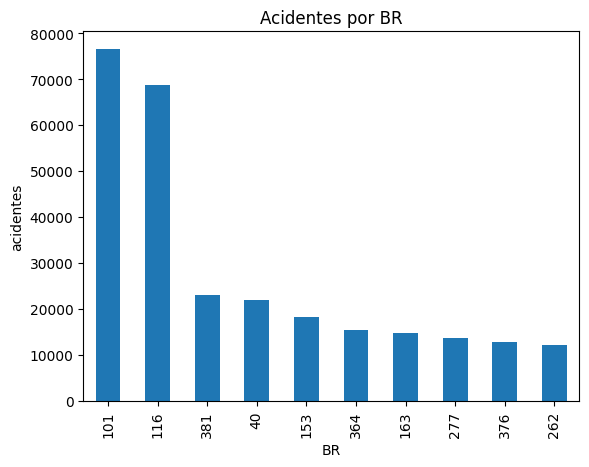

In [40]:
# Com a visualização, algumas perguntas surgem, para respondê-las, vou utilizar gráficos, e para isso, vou importar a biblioteca de visualização.
import matplotlib.pyplot as plt

# Qual a BR com mais acidentes?
acidentes_br = data["br"].value_counts().nlargest(10)

acidentes_br.plot(kind='bar', title='Acidentes por BR')
plt.xlabel('BR')
plt.ylabel('acidentes')
plt.show()

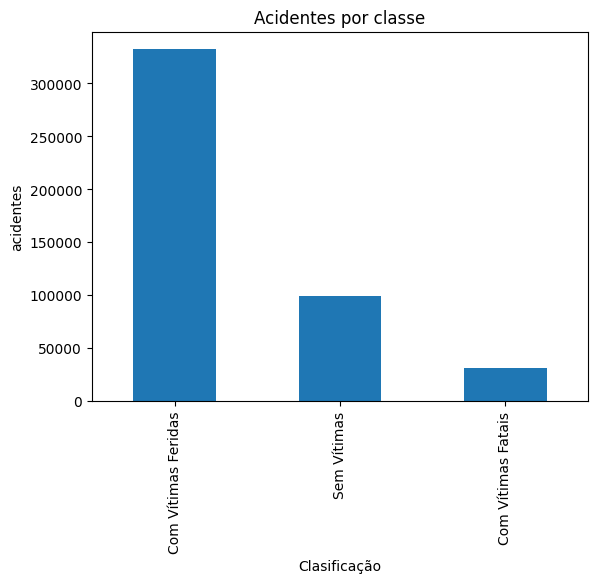

In [43]:
# Quantos acidentes têm vítimas feridas, fatais ou não possui vítimas?
class_acidente = data["classificacao_acidente"].value_counts().nlargest(10)

class_acidente.plot(kind='bar', title='Acidentes por classe')
plt.xlabel('Clasificação')
plt.ylabel('acidentes')
plt.show()

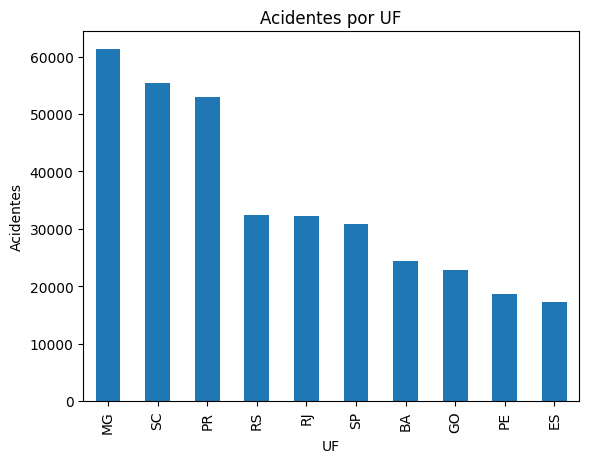

In [42]:
# Qual UF tem mais acidentes?
acidentes_uf = data["uf"].value_counts().nlargest(10)

acidentes_uf.plot(kind='bar', title='Acidentes por UF')
plt.xlabel('UF')
plt.ylabel('Acidentes')
plt.show()

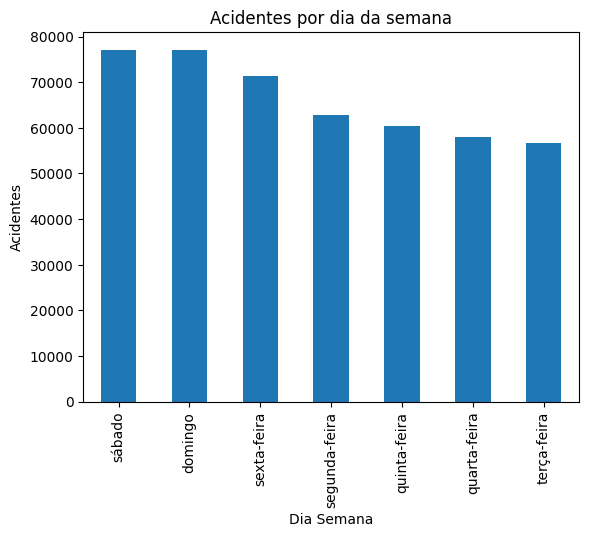

In [44]:
# Qual dia da semana tem mais acidentes?
acidentes_dia_semana = data["dia_semana"].value_counts().nlargest(10)

acidentes_dia_semana.plot(kind='bar', title='Acidentes por dia da semana')
plt.xlabel('Dia Semana')
plt.ylabel('Acidentes')
plt.show()

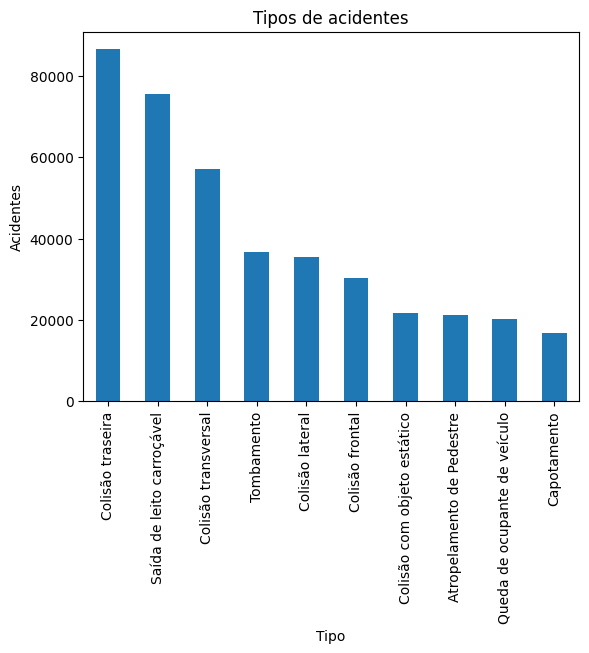

In [45]:
# Qual o tipo de acidente mais comum?
tipo_acidente = data["tipo_acidente"].value_counts().nlargest(10)

tipo_acidente.plot(kind='bar', title='Tipos de acidentes')
plt.xlabel('Tipo')
plt.ylabel('Acidentes')
plt.show()

In [38]:
# Qual a causa de acidente mais comum?
print("Causas comuns de acidentes")
data["causa_acidente"].value_counts()

Causas comuns de acidentes


causa_acidente
Falta de Atenção à Condução                          107540
Velocidade Incompatível                               43581
Desobediência às normas de trânsito pelo condutor     29236
Ingestão de Álcool                                    22097
Reação tardia ou ineficiente do condutor              21549
                                                      ...  
Sinalização encoberta                                    10
Obstrução Via tentativa Assalto                          10
Transtornos Mentais (exceto suicidio)                     6
Suicídio (presumido)                                      5
Sistema de drenagem ineficiente                           4
Name: count, Length: 90, dtype: int64

In [46]:
# Quantos acidentes por ano?
data["data_inversa"].value_counts()

data_inversa
2017-12-23    449
2017-02-25    409
2017-12-22    397
2017-05-19    390
2017-09-30    366
             ... 
2018-05-26     83
2020-03-26     77
2018-05-29     75
2020-03-25     72
2020-03-23     70
Name: count, Length: 2434, dtype: int64

In [51]:
# Para somar o total de acidentes por ano, é necessário modificar o formato da coluna "data_inversa", de string para datetime.
# Antes de alterar, farei outro backup.
data_backup2 = data.copy()

# Agora, vou alterar
data['data_inversa'] = pd.to_datetime(data['data_inversa'])

# Visualizar o tipo de dado na coluna
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 460889 entries, 0 to 463151
Data columns (total 27 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   data_inversa            460889 non-null  datetime64[ns]
 1   dia_semana              460889 non-null  object        
 2   horario                 460889 non-null  object        
 3   uf                      460889 non-null  object        
 4   br                      460889 non-null  object        
 5   km                      460889 non-null  object        
 6   municipio               460889 non-null  object        
 7   causa_acidente          460889 non-null  object        
 8   tipo_acidente           460889 non-null  object        
 9   classificacao_acidente  460889 non-null  object        
 10  fase_dia                460889 non-null  object        
 11  sentido_via             460889 non-null  object        
 12  condicao_metereologica  460889 non-

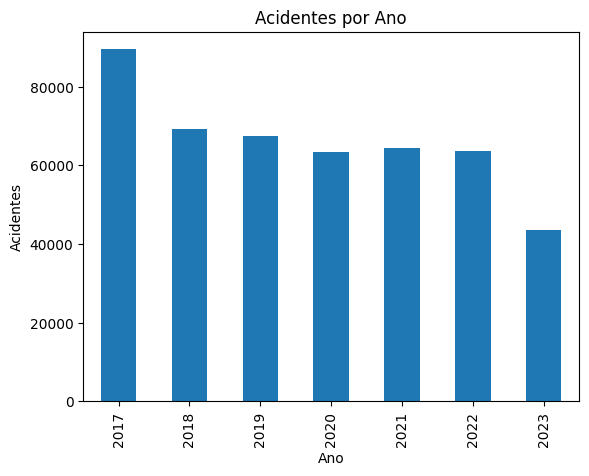

In [53]:
# Agora posso somar o total de acidentes por ano
acidentes_por_ano = data['data_inversa'].dt.year.value_counts().sort_index()

acidentes_por_ano.plot(kind='bar', title='Acidentes por Ano')
plt.xlabel('Ano')
plt.ylabel('Acidentes')
plt.show()

## Buscando correlações

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463152 entries, 0 to 463151
Data columns (total 27 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   data_inversa            463152 non-null  object 
 1   dia_semana              463152 non-null  object 
 2   horario                 463152 non-null  object 
 3   uf                      463152 non-null  object 
 4   br                      462162 non-null  float64
 5   km                      462162 non-null  object 
 6   municipio               463152 non-null  object 
 7   causa_acidente          463152 non-null  object 
 8   tipo_acidente           463112 non-null  object 
 9   classificacao_acidente  463152 non-null  object 
 10  fase_dia                463152 non-null  object 
 11  sentido_via             463152 non-null  object 
 12  condicao_metereologica  463152 non-null  object 
 13  tipo_pista              463152 non-null  object 
 14  tracado_via         

In [85]:
# Backup dos dados antes das alterações no dataset
backup3 = data.copy()

In [86]:
# Para criar o mapa de correlação, preciso instalar o sklearning.preprocessing, que transformará os dados para gerar a visualização.
!pip install sklearn.preprocessing

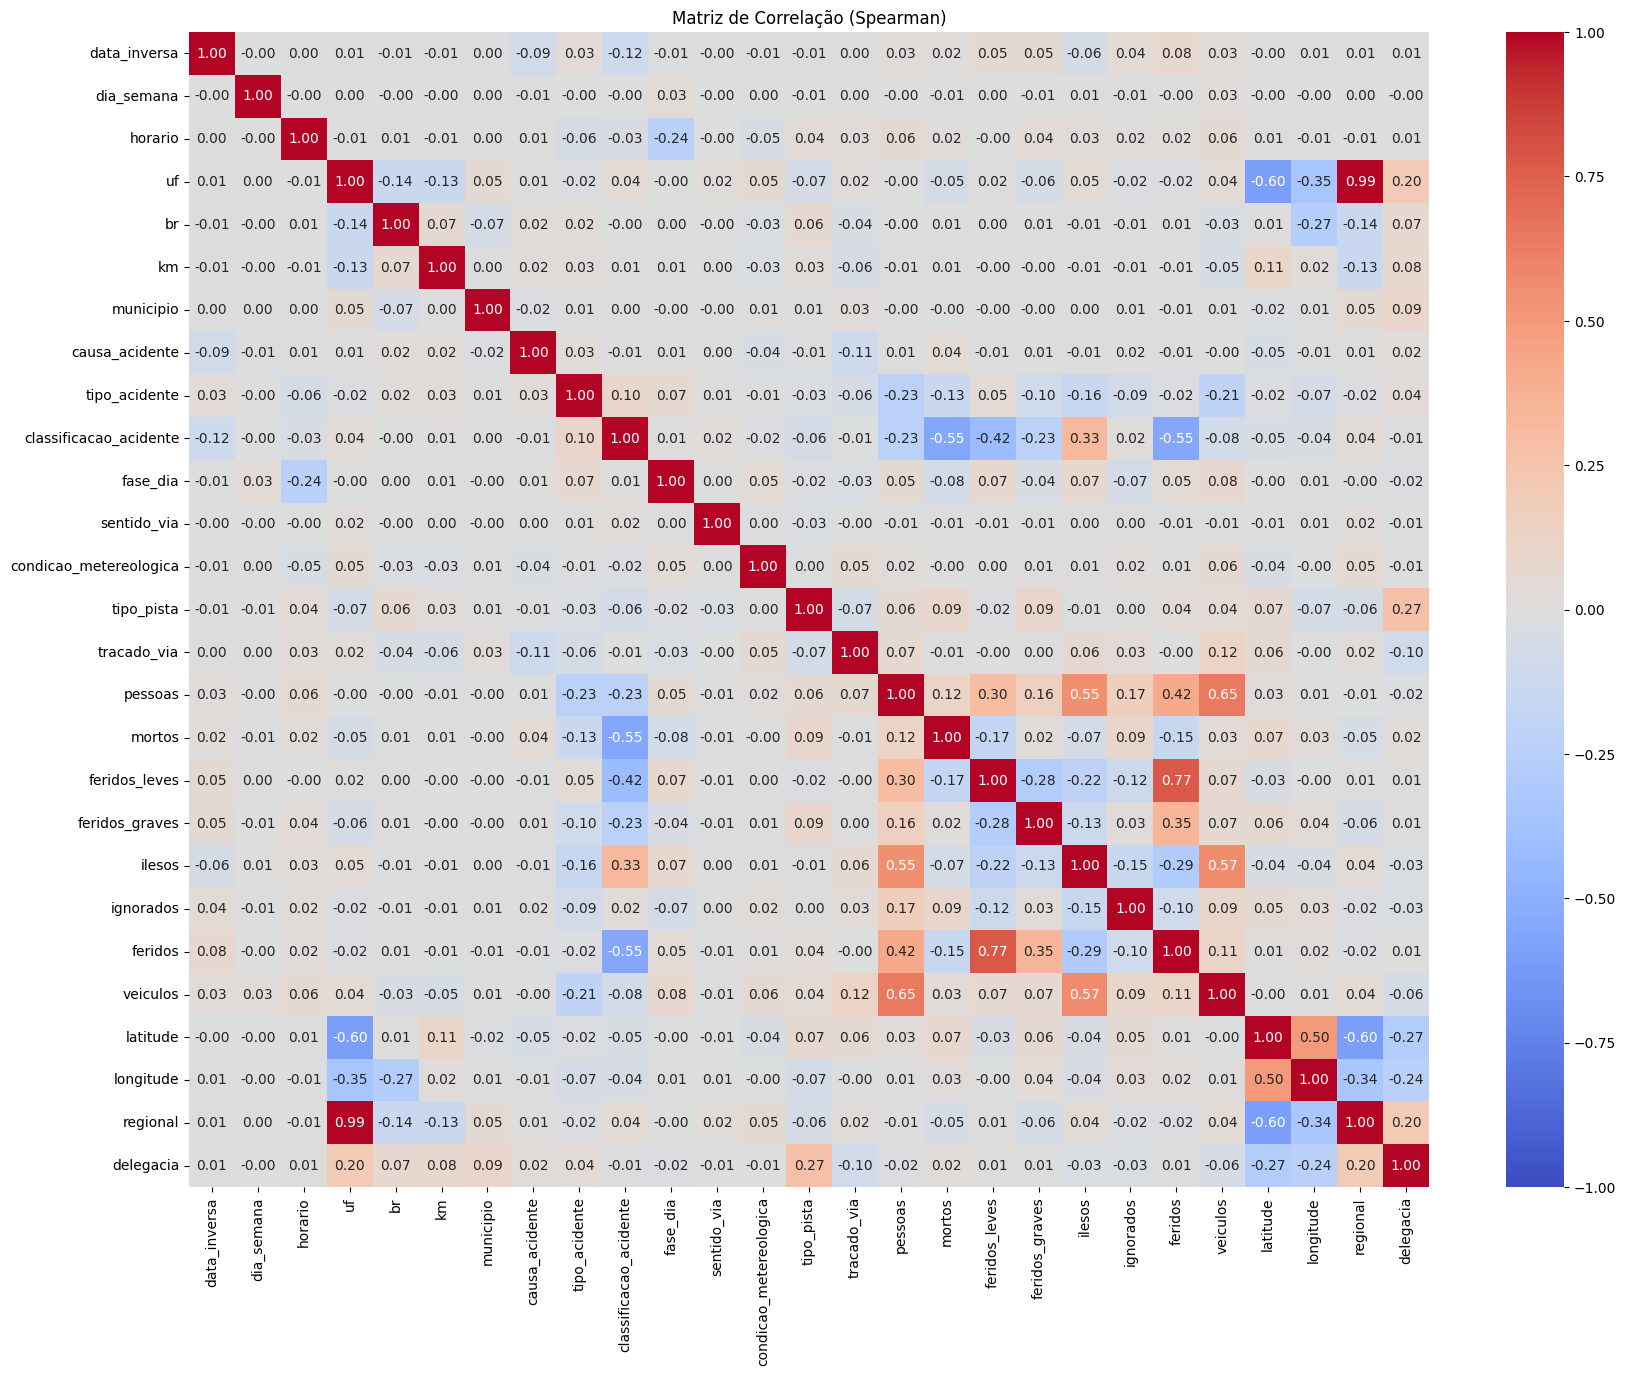

In [47]:
# Com o sk instalado, vou importar o LabelEncoder, que armazena o valor numérico que será inserido para cada valor objeto ou categórico
from sklearn.preprocessing import LabelEncoder

# Agora, vou selecionar apenas as colunas categóricas e strings
cat_cols = data.select_dtypes(include=['object', 'category']).columns

# Codificar automaticamente com o LabelEncoder
label_encoders = {}
data_encoded = data.copy()

# Atribuir valor numérico às colunas selecionadas
for col in cat_cols:
    le = LabelEncoder()
    data_encoded[col] = le.fit_transform(data[col].astype(str))
    label_encoders[col] = le  # Guarda os encoders para referência

# Criar o heatmap de correlação (Spearman)
plt.figure(figsize=(20, 15))
sns.heatmap(data_encoded.corr(method='spearman'), 
            annot=True, 
            fmt=".2f", 
            cmap='coolwarm',
            center=0,
            vmin=-1,
            vmax=1)
plt.title('Matriz de Correlação (Spearman)')
plt.show()

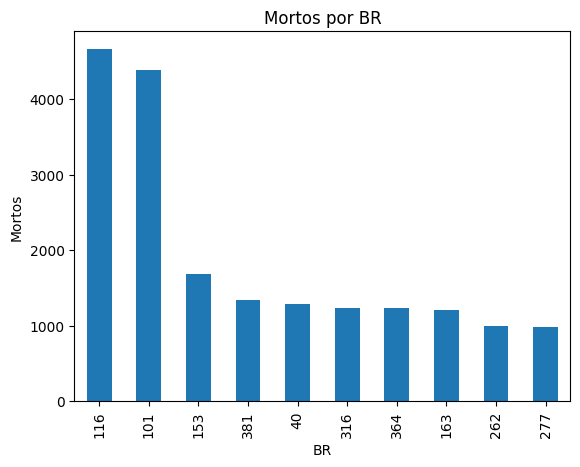

In [48]:
# Já sei quais as BRs ondem ocorrem mais acidentes, mas preciso descobrir quais as BRs que mais têm acidentes fatais.
top_br_mortos = data.groupby('br')['mortos'].sum().nlargest(10)

top_br_mortos.plot(kind='bar', title='Mortos por BR')
plt.xlabel('BR')
plt.ylabel('Mortos')
plt.show()

In [17]:
# Sabendo que as BRs 101 e 116 têm (cada uma) mais que o dobro de mortes que as demais BRs, quero identificar padrões nos acidentes.
# Para isso, vou filtrar dados para BR-101 e BR-116
brs_criticas = data[data['br'].isin([101, 116])]

# Agrupar por BR e analisar fatores
fatores = ['tipo_acidente', 'condicao_metereologica', 'fase_dia', 'tipo_pista','veiculos']
for fator in fatores:
    print(f"\nDistribuição de {fator} nas BRs 101 e 116:")
    display(pd.crosstab(brs_criticas['br'], brs_criticas[fator], normalize='index'))


Distribuição de tipo_acidente nas BRs 101 e 116:


tipo_acidente,Atropelamento de Animal,Atropelamento de Pedestre,Capotamento,Colisão com objeto,Colisão com objeto em movimento,Colisão com objeto estático,Colisão frontal,Colisão lateral,Colisão lateral mesmo sentido,Colisão lateral sentido oposto,Colisão transversal,Colisão traseira,Danos eventuais,Derramamento de carga,Engavetamento,Eventos atípicos,Incêndio,Queda de ocupante de veículo,Saída de leito carroçável,Tombamento
br,,,,,,,,,,,,,,,,,,,,
101.0,0.013902,0.051687,0.03299,0.033016,0.003319,0.056364,0.04582,0.091144,0.048107,0.005788,0.119026,0.219224,0.001646,0.002234,0.016841,0.001450,0.013706,0.051844,0.113159,0.078732
116.0,0.012992,0.053845,0.03594,0.037306,0.003793,0.067549,0.04559,0.081908,0.045663,0.007237,0.091282,0.214696,0.001860,0.004069,0.019823,0.002064,0.020070,0.046331,0.119156,0.088826



Distribuição de condicao_metereologica nas BRs 101 e 116:


condicao_metereologica,Chuva,Céu Claro,Garoa/Chuvisco,Granizo,Ignorado,Neve,Nevoeiro/Neblina,Nublado,Sol,Vento
br,,,,,,,,,,
101.0,0.128547,0.539274,0.034413,0.000013,0.010935,0.000013,0.004547,0.201855,0.077907,0.002495
116.0,0.114744,0.531374,0.048333,0.000058,0.012585,0.000015,0.011204,0.213387,0.067065,0.001235



Distribuição de fase_dia nas BRs 101 e 116:


fase_dia,Amanhecer,Anoitecer,Plena Noite,Pleno dia
br,,,,
101.0,0.041207,0.052613,0.346773,0.559407
116.0,0.054727,0.053957,0.363051,0.528265



Distribuição de tipo_pista nas BRs 101 e 116:


tipo_pista,Dupla,Múltipla,Simples
br,,,
101.0,0.512216,0.166762,0.321022
116.0,0.478420,0.149432,0.372148



Distribuição de veiculos nas BRs 101 e 116:


veiculos,1,2,3,4,5,6,7,8,9,10,11,12,14
br,,,,,,,,,,,,,
101.0,0.424549,0.489574,0.064398,0.014816,0.004194,0.001659,0.000405,0.000209,0.000105,0.000039,0.000013,0.000013,0.000026
116.0,0.464484,0.448179,0.065045,0.014648,0.004839,0.001497,0.000872,0.000145,0.000073,0.000116,0.000015,0.000087,0.000000


In [49]:
# Alguns insights obtidos com o resultado:

# 1. 91,33% dos acidentes envolvem ATÉ 2 CARROS.
# 2. 49% das mortes ocorrem em PISTAS DUPLAS, 15% em PISTAS MÚLTIPLAS e 36% em PISTAS SIMPLES.
# 3. 53% das mortes ocorrem em PLENO DIA, 35% em PLENA NOITE.
# 4. 53% das mortes ocorrem sob CÉU CLARO, 11% sob CHUVA.
# 5. 21% das mortes vêm da COLISÃO TRASEIRA, 10% vêm de COLISÃO TRANSVERSAL, 11% vêm da SAÍDA DO LEITO CARROÇÁVEL (saída da pista).

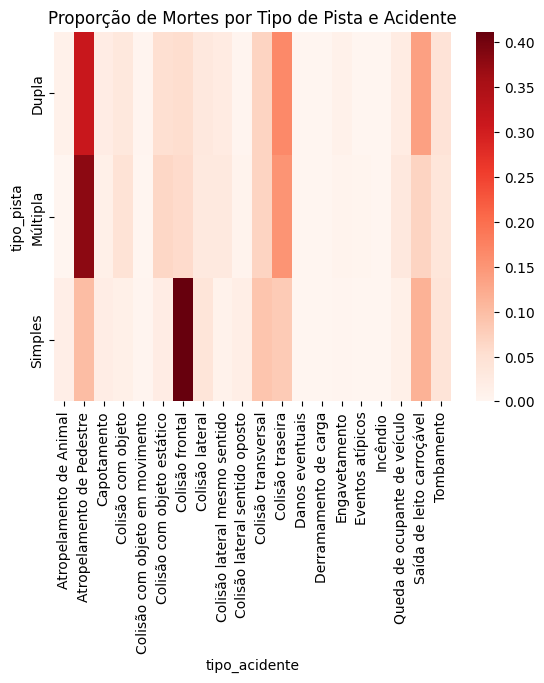

In [50]:
# Agora, quero entender a correlação entre o tipo de acidente e o tipo de pista, para isso, usarei a biblioteca seaborn:
import seaborn as sns

sns.heatmap(
    pd.crosstab(
        data['tipo_pista'], 
        data['tipo_acidente'], 
        values=data['mortos'], 
        aggfunc='sum',
        normalize='index'
    ),
    annot=False,
    fmt=".1%",
    cmap='Reds'
)
plt.title('Proporção de Mortes por Tipo de Pista e Acidente');

In [52]:
# Insights obtidos com o heatmap:

# 1. A COLISÃO FRONTAL tem correlação FORTE com PISTA SIMPLES.
# 2. O ATROPELAMENTO DE PEDESTRE tem correlação FORTE com PISTAS DUPLAS E MÚLTIPLAS, e FRACA com PISTAS SIMPLES.
# 3. A SAÍDA DO LEITO CARROÇÁVEL tem correlação FORTE com PISTAS SIMPLES E DUPLAS, e FRACA com PISTAS MÚLTIPLAS.

## Fim.